# Neural Network Multi-class Classification

### Notations:
- $L$ : No. of layers (excluding input layer).
- $m$ : No. of examples.
- $\ast ^{[l](i)}_i$ : $\ast$ of $i$-th neuron of $l$-th layer for $i$-th example. 
- $n^{[l]}$ : No. of neurons in $l$-th layer (excling bias neuron).
    - $n^{[0]} = n$
- $a^{[l]}_q$ : Activation of $q$-th neuron in $l$-th layer.  
    - $a^{[0]} = X$ and $a^{[L]} = \hat{y}$


- $W^{[l]}$ :  $(n^{[l-1]}+1) \times n^{[l]}$ weight matrix of $l$-th layer.
    - $W^{[l]}_{p,q}$ : Weight of connection from $p$-th neuron in $(l-1)$-th layer to $q$-th neuron in $l$-th layer.
    - $W^{[l]} = \begin{bmatrix}
W^{[l]}_{0,1} & W^{[l]}_{0,2} & \ldots & W^{[l]}_{0,q} & \ldots & W^{[l]}_{0,n^{[l]}} \\
W^{[l]}_{1,1} & W^{[l]}_{1,2} & \ldots & W^{[l]}_{1,q} & \ldots & W^{[l]}_{1,n^{[l]}} \\
\vdots & \vdots & \vdots & \ldots & \vdots \\
W^{[l]}_{p,1} & W^{[l]}_{p,2} & \ldots & W^{[l]}_{p,q} & \ldots &  W^{[l]}_{p,n^{[l]}}\\
\vdots & \vdots & \vdots & \ldots & \vdots \\
W^{[l]}_{n^{[l-1]},1} & W^{[l]}_{n^{[l-1]},2} & \ldots & W^{[l]}_{n^{[l-1]},q} & \ldots & W^{[l]}_{n^{[l-1]},n^{[l]}}
\end{bmatrix}$

Here,  
$L = 2$  
$n^{[0]} = 400$, $n^{[1]} = 25$, $n^{[2]} = 10$

## Network Architecture
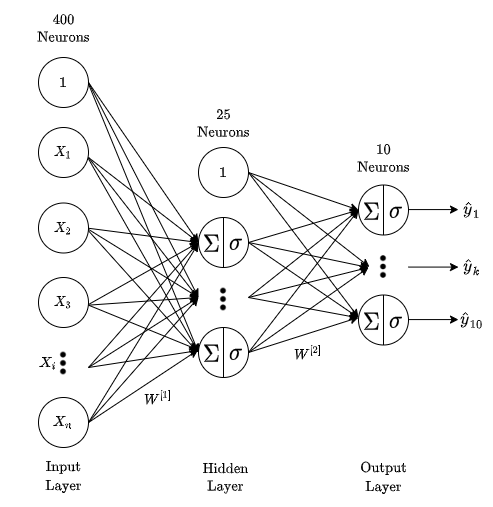

In [1]:
%matplotlib inline

import numpy as np
import collections
import matplotlib.pyplot as plt
import pickle

In [2]:
def showExamples(img, y=None):
    """
    Shows some examples from image dataset with classes/labels (if given).
    
        Parameters:
            img (numpy array): m x 400 array of images (m 20x20 images)
            y (numpy array)  : m x 1 array of classes/labels corresponding to each image
        Returns:
            None
    """
    m = img.shape[0]    # Number of images
    idx_ary = np.random.randint(0, m, (5,5))
    _, ax_ary = plt.subplots(5, 5, figsize=(5, 5))
    for i in range(5):
        for j in range(5):
            idx = idx_ary[i,j]
            x_eg = img[idx].reshape((20,-1),order='F')
            ax_ary[i,j].imshow(x_eg, cmap='gray_r')
            
            if y is not None:
                y_eg = int(y[idx].squeeze())
                ax_ary[i,j].set_title(str(y_eg))
            
            ax_ary[i,j].axis('off')

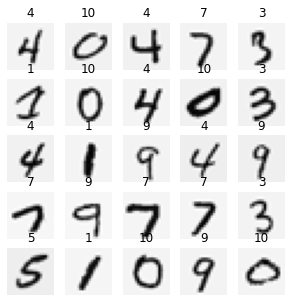

In [3]:
# Load and preprocess data
data = np.genfromtxt('mnist_subset.csv', delimiter=',')
m, n = data.shape

# Shuffle data
np.random.shuffle(data)

X = (data[:,0:-1]).reshape((m,-1))
y = data[:,-1].reshape((m,1))

classes = np.unique(y)
n_classes = classes.shape[0]

# Convert each output label to one-hot vector
targets = y.ravel()
targets = np.array(y, dtype=int)               # Convert labels to int
targets = targets % 10                         # Convert labels 10 to 0
y_one_hot = np.eye(n_classes)[targets].squeeze()

# View some examples
showExamples(X, y)

In [4]:
def sigmoid(z):
    """
    Calculates element-wise sigmoid of given input array
    
        Parameters:
            z (numpy array)    : r x c input array
        Returns
            sigma (numpy array): Element-wise sigmoid r x c array  
    """
    sigma = 1/(1+np.exp(-z))
    return sigma

## Forward Propagation
<img src="NN_Neuron.png" align="left"/>
Activation of $q$-th neuron in $l$-th layer for $j$-th example,
$$
a^{[l](i)}_q = \sigma \left( z_q^{[l](i)} \right)
$$
where
$$
z_q^{[l](i)} = W^{[l]}_{0,q} + W^{[l]}_{1,q}a^{[l-1](i)}_1 + W^{[l]}_{2,q}a^{[l-1](i)}_2 + \ldots + W^{[l]}_{n^{[l-1]},q}a^{[l-1](i)}_{n^{[l-1]}}
$$
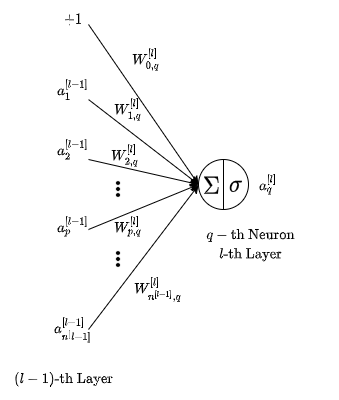

Activation of $n^{[l]}$ neurons in $l$-th layer for $i$-th example, 
$$\begin{align}
\begin{bmatrix} 
a^{[l](i)}_1 & a^{[l](i)}_2 & \ldots & a^{[l](i)}_q & \ldots & a^{[l](i)}_{n^{[l]}}
\end{bmatrix}
&= \sigma \left(
\begin{bmatrix} 
1 & a^{[l-1](i)}_1 & \ldots & a^{[l-1](i)}_p & \ldots & a^{[l-1](i)}_{n^{[l-1]}}
\end{bmatrix}
\begin{bmatrix}
W^{[l]}_{0,1} & W^{[l]}_{0,2} & \ldots & W^{[l]}_{0,q} & \ldots & W^{[l]}_{0,n^{[l]}} \\
W^{[l]}_{1,1} & W^{[l]}_{1,2} & \ldots & W^{[l]}_{1,q} & \ldots & W^{[l]}_{1,n^{[l]}} \\
\vdots & \vdots & \vdots & \ldots & \vdots \\
W^{[l]}_{p,1} & W^{[l]}_{p,2} & \ldots & W^{[l]}_{p,q} & \ldots &  W^{[l]}_{p,n^{[l]}}\\
\vdots & \vdots & \vdots & \ldots & \vdots \\
W^{[l]}_{n^{[l-1]},1} & W^{[l]}_{n^{[l-1]},2} & \ldots & W^{[l]}_{n^{[l-1]},q} & \ldots & W^{[l]}_{n^{[l-1]},n^{[l]}}
\end{bmatrix}
\right)
\\
\begin{bmatrix} 
- a^{[l](i)} -
\end{bmatrix} 
&= \sigma \left(
\begin{bmatrix} 
- a^{[l-1](i)} -
\end{bmatrix}
W^{[l]}
\right)
\end{align}$$

For $m$-examples,
$$\begin{align}
\begin{bmatrix} 
- a^{[l](0)} - \\ - a^{[l](1)} - \\ \vdots \\ - a^{[l](m-1)} -
\end{bmatrix} 
&= \sigma \left(
\begin{bmatrix} 
- a^{[l-1](0)} - \\ - a^{[l-1](1)} - \\ \vdots \\ - a^{[l-1](m-1)} -
\end{bmatrix}
W^{[l]}
\right)
\end{align}$$

$$\begin{align}
a^{[l]} &= \sigma(a^{[l-1]}W^{[l]}) \;\;\;\;  l=1, 2, \ldots L\\
a^{[0]} &= X \\
\hat{y} &= a^{[L]}
\end{align}$$ 

In [5]:
def forwardProp(X, W_dict):
    """
    Performs one forward propagation of given input examples.
    
        Parameters:
            X (numpy array): m x n[0] input matrix (m examples of n[0] features)
            W_dict (dict)  : Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                            'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer, ...}
        Returns :
            A_dict (dict)  : Activation dictionary in the form {'A0': m x (n[0]+1) numpy array of activation of input layer,
                                                                'A1': m x (n[1]+1) numpy array of activation of 1st layer,
                                                                'A2': m x (n[2]+1) numpy array of activation of 2nd layer, ...}
    """
    L = len(W_dict)
    A_dict = {}
    
    a_prev = X 
    m = X.shape[0]
    # Append bias neuron activation (1's)
    a_prev = np.append(np.ones((m,1)), a_prev, axis=1)
    A_dict["A0"] = a_prev
    
    for l in range(1, L+1):
        W = W_dict['W'+str(l)]
        a_prev = sigmoid(np.dot(a_prev, W))
        # Append bias neuron activation (1's)
        a_prev = np.append(np.ones((m,1)), a_prev, axis=1)
        A_dict["A"+str(l)] = a_prev
    
    return A_dict

## Cost Function
$$J = \frac{1}{m}\sum_{i=0}^{m-1}\sum_{k=0}^{K-1}\left[-y_k^{(i)}\log{\hat{y}^{(i)}_k}-\left(1-y_k^{(i)}\right)\log\left(1-\hat{y}_k^{(i)}\right)\right]$$

In [6]:
def computeCost(y, y_hat):
    '''
    Computes cost and estimated output for logistic regression.
    
        Parameters:
            y (numpy array)    : m x K output matrix with one-hot row vectors
            y_hat (numpy array): m x K estimated output matrix
        Returns:
            J (double)         : Cost
    '''
    m = y.shape[0]
    J = 1/m*(-np.sum(np.log(y_hat[y==1]))-np.sum(np.log(1-y_hat[y==0])))
    return J

## Weight Initialization
### Xavier Initialization
Initialize weights such that
$$W^{[l]} \in \left[ -\sqrt{ \frac{6}{n^{[l-1]}+n^{[l]}} }, \sqrt{ \frac{6}{n^{[l-1]}+n^{[l]}} } \right]$$
$$$$

In [7]:
def initWeights(L, n):
    """
    Initialize weights of NN based on Xavier initializaltion.
    
        Parameters :
            L (int)      : Number of layers (excluding input layer)
            n (int)      : Number of neurons in each layer  (including input layer)
        Returns :
            W_dict (dict): Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                    'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer, ...}
    """
    W_dict = {}
    for l in range(1, L+1):
        W_dict['W'+str(l)] = (np.random.rand(n[l-1]+1, n[l])*2-1)*np.sqrt(6/(n[l-1] + n[l]))
    
    return W_dict

## Back Propagation

### Gradient Calculation

Let $p$ represents a neuron in the input layer (layer 0), $q$ represents a neuron in the hiddden layer (layer 1) and $r$ represents a neuron in the output layer (layer 2).

For $L = 1$,
$$a_q^{[1](i)} = \sigma \left( z_q^{[1](i)} \right)$$
where
$$z_q^{[1](i)} = W^{[1]}_{0,q} + W^{[1]}_{1,q}a^{[0](i)}_1 + W^{[1]}_{2,q}a^{[0](i)}_2 + \ldots +  W^{[1]}_{p,q}a^{[0](i)}_p + \ldots + W^{[1]}_{n^{[0]},q}a^{[0](i)}_{n^{[0]}}$$

For $L = 2$,
$$a_r^{[2](i)} = \sigma \left( z_r^{[2](i)} \right)$$
where
$$z_r^{[2](i)} = W^{[2]}_{0,r} + W^{[2]}_{1,r}a^{[1](i)}_1 + W^{[2]}_{2,r}a^{[1](i)}_2 + \ldots +  W^{[2]}_{q,r}a^{[1](i)}_q + \ldots + W^{[2]}_{n^{[1]},r}a^{[1](i)}_{n^{[1]}}$$
---

$$\begin{align}
\frac{\partial J}{\partial W^{[l]}_{a,b}} &= \frac{1}{m}\sum_{i=0}^{m-1}\sum_{k=1}^{n^{[2]}}\left( -\frac{y_k^{(i)}}{\hat{y}_k^{(i)}} + \frac{1-y_k^{(i)}}{1-\hat{y}_k^{(i)}} \right) \frac{\partial \hat{y}_k^{(i)}}{\partial W^{[l]}_{a,b}} \\
\frac{\partial J}{\partial W^{[l]}_{a,b}} &= \frac{1}{m}\sum_{i=0}^{m-1}\sum_{k=1}^{n^{[2]}}\left( -\frac{y_k^{(i)}}{a_k^{[2](i)}} + \frac{1-y_k^{(i)}}{1-a_k^{[2](i)}} \right) \frac{\partial a_k^{[2](i)}}{\partial W^{[l]}_{a,b}}
\end{align}$$

---

$$\begin{align}
\frac{\partial a_k^{[2](i)}}{\partial W^{[2]}_{q,r}} &= \frac{\partial \sigma\left(z_k^{[2](i)}\right)}{\partial W^{[2]}_{q,r}} \\
                                                     &= \sigma '\left(z_k^{[2](i)}\right) \frac{\partial z_k^{[2](i)}}{\partial W^{[2]}_{q,r}}
\end{align}$$

$$\begin{align}
\frac{\partial z_k^{[2](i)}}{\partial W^{[2]}_{q,r}} = 
   \begin{cases}
      0 & k \ne r\\
      a_q^{[1](i)} & k = r 
    \end{cases}  
\end{align}$$

Therefore,
$$\begin{align} 
\frac{\partial a_k^{[2](i)}}{\partial W^{[2]}_{q,r}} &= 0 \textrm{ for } k \ne r\\
\frac{\partial a_r^{[2](i)}}{\partial W^{[2]}_{q,r}} &= \sigma \left(z_r^{[2](i)}\right) \left[1-\sigma \left(z_r^{[2](i)}\right)\right]a_q^{[1](i)}\\
                                                     &= a_r^{[2](i)}\left(1-a_r^{[2](i)}\right)a_q^{[1](i)}
\end{align}$$

Hence,
$$\begin{align}
\frac{\partial J}{\partial W^{[2]}_{q,r}} &= \frac{1}{m}\sum_{i=0}^{m-1} \left[ -y_r^{(i)} \left( 1-a_r^{[2](i)} \right) + \left( 1-y_k^{(i)} \right) a_r^{[2](i)} \right] a_q^{[1](i)}\\
\frac{\partial J}{\partial W^{[2]}_{q,r}} &= \frac{1}{m}\sum_{i=0}^{m-1} \left( a_r^{[2](i)} - y_r^{(i)} \right) a_q^{[1](i)}
\end{align}$$

---

$$\begin{align}
\frac{\partial a_k^{[2](i)}}{\partial W^{[1]}_{p,q}} &= \frac{\partial \sigma\left(z_k^{[2](i)}\right)}{\partial W^{[1]}_{p,q}} \\
                                                     &= \sigma '\left(z_k^{[2](i)}\right) \frac{\partial z_k^{[2](i)}}{\partial W^{[1]}_{p,q}}
\end{align}$$

$$\begin{align}
\frac{\partial z_k^{[2](i)}}{\partial W^{[1]}_{p,q}} 
    &= \frac{\partial z_k^{[2](i)}}{\partial a_q^{[1](i)}} \frac{\partial a_q^{[1](i)}}{\partial W^{[1]}_{p,q}}\\
    &= W^{[2]}_{q,k}\frac{\partial a_q^{[1](i)}}{\partial W^{[1]}_{p,q}}\\
    &= W^{[2]}_{q,k}\frac{\partial \sigma \left(z_q^{[1](i)} \right)}{\partial W^{[1]}_{p,q}}\\
    &= W^{[2]}_{q,k}\sigma ' \left(z_q^{[1](i)} \right) \frac{\partial z_q^{[1](i)}}{\partial W^{[1]}_{p,q}}\\
\frac{\partial z_k^{[2](i)}}{\partial W^{[1]}_{p,q}} 
    &= W^{[2]}_{q,k}\sigma ' \left(z_q^{[1](i)} \right) a_p^{[0](i)}
\end{align}$$

Therefore,
$$\begin{align}
\frac{\partial a_k^{[2](i)}}{\partial W^{[1]}_{p,q}} &= \sigma \left(z_k^{[2](i)}\right) \left[ \sigma \left(z_k^{[2](i)}\right) \right]W^{[2]}_{q,k}\sigma ' \left(z_q^{[1](i)} \right) a_p^{[0](i)}\\
\frac{\partial a_k^{[2](i)}}{\partial W^{[1]}_{p,q}} &= a_k^{[2](i)} \left( 1 - a_k^{[2](i)} \right)W^{[2]}_{q,k}\sigma ' \left(z_q^{[1](i)} \right) a_p^{[0](i)}
\end{align}$$

Hence,
$$\begin{align}
\frac{\partial J}{\partial W^{[1]}_{p,q}} &= \frac{1}{m}\sum_{i=0}^{m-1}\sum_{k=1}^{n^{[2]}} \left( a_k^{[2](i)} - y_k^{(i)} \right) W^{[2]}_{q,k}\sigma ' \left(z_q^{[1](i)} \right) a_p^{[0](i)}\\
\frac{\partial J}{\partial W^{[1]}_{p,q}} &= \frac{1}{m}\sum_{i=0}^{m-1}\sum_{k=1}^{n^{[2]}} \left( a_k^{[2](i)} - y_k^{(i)} \right) W^{[2]}_{q,k}\sigma ' \left(z_q^{[1](i)} \right) x_p^{(i)}
\end{align}$$

### Vectorization

$$\begin{align}
\frac{\partial J}{\partial W^{[2]}} &= \frac{1}{m}A^{[1]T}\left( A^{[2]} - y \right)\\
\frac{\partial J}{\partial W^{[1]}} &= \frac{1}{m}X^T\left[ \left(A^{[2]}-Y \right) W^{[2]T} * \sigma ' \left( z^{[1]} \right) \right]
\end{align}$$

In [8]:
def computeGrad(A_dict, y, W_dict):
    '''
    Updates weights based on gradients
    
        Parameters:
            A_dict (dict)  : Activation dictionary in the form {'A0': m x (n[0]+1) numpy array of activation of input layer,
                                                               'A1': m x (n[1]+1) numpy array of activation of 1st layer,
                                                               'A2': m x (n[2]+1) numpy array of activation of 2nd layer}
            y (numpy array): m x n[L] output matrix with one-hot row vectors
            W_dict (dict)  : Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                           'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer}
        Returns:
            dW_dict (dict) : Gradient of weight in the form {'dW1': n[0]+1 x n[1] numpy array of gradient of weights W1,
                                                            'dW2': n[1]+1 x n[2] numpy array of gradient of weights W2}
    '''
    A0 = A_dict["A0"]
    A1 = A_dict["A1"]
    A2 = A_dict["A2"]
    
    W1 = W_dict["W1"]
    W2 = W_dict["W2"]
    
    m = A0.shape[0]
    
    dW_dict = {}
    dW_dict["dW2"] = 1/m * np.dot(A1.T, (A2[:,1:]-y))
    dW_dict["dW1"] = 1/m * np.dot(A0.T, np.dot(A2[:,1:]-y, W2.T) * A1*(1-A1))[:, 1:]
    
    return dW_dict

#### Gradient Checking (Bug Found)
Numerically,
$$\frac{\partial J}{\partial W^{[l]}} = \frac{J(W^{[l]}+\epsilon)-J(W^{[l]}-\epsilon)}{2\epsilon}$$

In [9]:
def numericalGrad(X, y, W_dict):
    """
    Computes gradient numerically for gradient checking.
        
        Parameters:
            X (numpy array): m x n[0] input matrix (m examples of n[0] features)
            y (numpy array): m x K example output matrix with one-hot column
            W_dict (dict)  : Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                            'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer, ...}
        Returns:
            dW_dict (dict): Gradient of weight in the form {'dW1': n[0]+1 x n[1] numpy array of gradient of weights W1,
                                                            'dW2': n[1]+1 x n[2] numpy array of gradient of weights W2, ...}
    """
    e = 1e-5    
    L = len(W_dict)

    dW_dict = {}
    for l in range(1, L+1):
        dW_dict['dW'+str(l)] = np.zeros(W_dict["W"+str(l)].shape)
        for i in range(0, W_dict["W"+str(l)].shape[0]):
            for j in range(0, W_dict["W"+str(l)].shape[1]):
                W_dict_plus = W_dict
                
                W_dict_plus["W"+str(l)][i][j] =  W_dict_plus["W"+str(l)][i][j] + e
                yhat = forwardProp(X, W_dict_plus)["A"+str(L)][:,1:]
                J_plus = computeCost(y, yhat)
                
                W_dict_minus = W_dict
                W_dict_minus["W"+str(l)][i][j] =  W_dict_minus["W"+str(l)][i][j] - e
                yhat = forwardProp(X, W_dict_minus)["A"+str(L)][:,1:]
                J_minus = computeCost(y, yhat)
                
                dW_dict['dW'+str(l)][i][j] = (J_plus - J_minus)/(e) # Bug
    
    return dW_dict

In [10]:
# Create a small NN for gradient checking
L_ = 2
n_ = [20, 5, 3]
m_ = 100

# Initialize weights
W_dict_ = initWeights(L_, n_)

X_ = np.random.rand(m_, n_[0])
one_hot_ = np.eye(n_[L_])
y_ = one_hot_[np.random.randint(0,n_[L_],m_)]
grad_n = numericalGrad(X_, y_, W_dict_)

A_dict_ = forwardProp(X_, W_dict_)
grad_ = computeGrad(A_dict_, y_, W_dict_)

grad_e = 0
for l in range(1, L_+1):
    grad_l = np.sum(grad_n["dW"+str(l)] - grad_["dW"+str(l)])
    print('Gradient Error in W['+ str(l) +']: ' + str(grad_l))
    grad_e = grad_e + grad_l

print('Gradient Error:', grad_e)

Gradient Error in W[1]: 1.984261166816919e-06
Gradient Error in W[2]: 5.8932007348661e-06
Gradient Error: 7.877461901683019e-06


### Gradient Descent
$$W^{[l]} := W^{[l]}-\alpha \frac{\partial J}{\partial W^{[l]}}$$

In [11]:
def gradientDescent(W_dict, dW_dict, alpha):
    """
    Performs gradient descent given gardient and learning rate.
    
        Parameters:
            W_dict (dict) : Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                            'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer}
            dW_dict (dict): Gradient of weight in the form {'dW1': n[0]+1 x n[1] numpy array of gradient of weights W1,
                                                            'dW2': n[1]+1 x n[2] numpy array of gradient of weights W2}
            alpha         : Learning rate
        Returns:
            W_dict (dict) : Updated weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                                   'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer}
            
    """
    L = len(W_dict)
    for l in range(1,L+1):
        W_dict["W"+str(l)] = W_dict["W"+str(l)] - alpha * dW_dict["dW"+str(l)]
        
    return W_dict

In [12]:
def backProp(A_dict, y, W_dict, alpha):
    """
    Performs one iteration of back propagation.
    
        Parameters:
            A_dict (dict)  : Activation dictionary in the form {'A0': m x (n[0]+1) numpy array of activation of input layer,
                                                                'A1': m x (n[1]+1) numpy array of activation of 1st layer,
                                                                'A2': m x (n[2]+1) numpy array of activation of 2nd layer}
            y (numpy array): m x n[L] output matrix with one-hot row vectors
            W_dict (dict)  : Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                            'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer}
            alpha          : Learning rate
        Returns:
            W_dict (dict)  : Updated weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                                    'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer}
    """
    dW_dict = computeGrad(A_dict, y, W_dict)
    W_dict = gradientDescent(W_dict, dW_dict, alpha)
    
    return W_dict

In [13]:
def train(X, y, W_dict, alpha, max_iterations=100_000, epsilon=1e-6):
    """
    Train the neural network.
        
        Parameters:
            X (numpy array)     : m x n[0] input matrix
            y (numpy array)     : m x K example output matrix with one-hot column
            W_dict (dict)       : Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                                 'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer, ...}
            alpha (float)       : Learning rate (Hyperparameter)
            max_iterations (int): Maximum no. of iterations
            epsilon (float)     : Convergence limit
        Returns:
            W_dict (dict)       : Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                                 'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer, ...}
            J_iterations (list) : Cost over iterations                                                    
    """
    
    J_iterations = []
    J_prev = np.inf
    for k in range(max_iterations):
        # Perform forward propagation
        A_dict = forwardProp(X, W_dict)
        # Compute cost
        J = computeCost(y_one_hot, A_dict['A'+str(L)][:,1:])
        if J_prev-J < epsilon:
            break
        J_prev = J
        
        J_iterations.append(J)
        # Print cost every 100 iteration
        if k % 100 == 0:
            print("Iteration #{:,}".format(k), "| Cost:", J, end='\r')
        
        # Perform back propagation
        W_dict = backProp(A_dict, y, W_dict, alpha)
    print("Iteration #{:,}".format(k), "| Cost:", J)
    
    return (W_dict, J_iterations)

Loading weights from file ...
Iteration #1 | Cost: 0.05386855448949433
CPU times: user 169 ms, sys: 136 ms, total: 305 ms
Wall time: 134 ms


Text(0, 0.5, 'Cost')

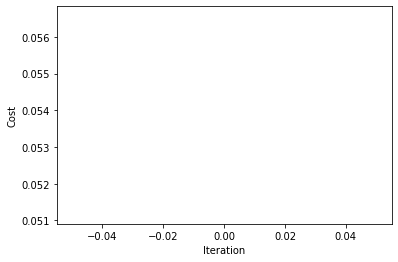

In [14]:
%%time

L = 2
n = [400, 25, 10]
alpha = 0.1

try:
    print("Loading weights from file ...")
    pickle_in = open("mnist_subset_nn_W_dict.pickle","rb")
    W_dict = pickle.load(pickle_in)
except FileNotFoundError:
    print("File not found. Random initializing weights ...")
    # Initialize weights
    W_dict = initWeights(L, n)

# Train NN
W_dict, J_iterations = train(X, y_one_hot, W_dict, alpha)

# Save weights to file
pickle_out = open("mnist_subset_nn_W_dict.pickle","wb")
pickle.dump(W_dict, pickle_out)
pickle_out.close()

# Plot cost over iteration
plt.plot(J_iterations)
plt.xlabel('Iteration')
plt.ylabel('Cost')

In [15]:
def predictClass(X, W_dict):
    """
    Predicts class of given input
    
        Parameters:
            X (numpy array)     : m x n[0] input matrix
            W_dict (dict)       : Weight dictionary in the form {'W1': n[0]+1 x n[1] numpy array of weights between input & 1st layer,
                                                                 'W2': n[1]+1 x n[2] numpy array of weights of 1st & 2nd layer, ...}
        Returns:
            y_pred (numpy array): 1 x m array of predicted classes
            y_prob (numpy array): 1 x m array of probabilities of prediced classes
    """
    m = X.shape[0]
    L = len(W_dict)
    
    y_hat = forwardProp(X, W_dict)["A"+str(L)][:,1:]
    
    y_pred = np.argmax(y_hat, axis=1).reshape(m,1)
    y_prob = np.max(y_hat, axis=1).reshape(m, 1)
    
    return (y_pred, y_prob)

In [16]:
y_pred, y_prob = predictClass(X, W_dict)
# Calculate training set accuracy 
accuracy = np.sum(y_pred == (y%10))/m * 100
print("Training Set Accuracy:", accuracy, '%')

Training Set Accuracy: 99.88 %


#### Wrong Classifications

P: Prediced class A: Given class


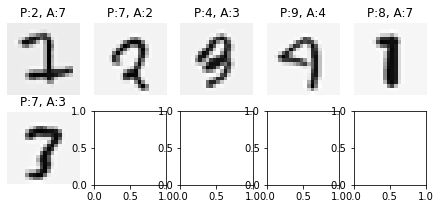

In [17]:
wrong = (y_pred != (y%10)).squeeze()
X_wrong = X[wrong]
y_wrong_pred = y_pred[wrong].squeeze()
y_wrong_actual = y[wrong].squeeze().astype('int')

print('P: Prediced class', 'A: Given class')
x_cells = X_wrong.shape[0]//5 + 1
_, ax_ary = plt.subplots(x_cells, 5, figsize=(1.5*5, 1.5*x_cells))
i = j = 0
for k in range(X_wrong.shape[0]):
    img_wrong = X_wrong[k].reshape((20,-1),order='F')
    ax_ary[i,j].imshow(img_wrong, cmap='gray_r')
    ax_ary[i,j].set_title("P:"+str(y_wrong_pred[k])+", A:"+str(y_wrong_actual[k]))
    ax_ary[i,j].axis('off')
    j = j+1
    if j >= 5:
        j = 0
        i = i+1